# Rainfall Distribution in India
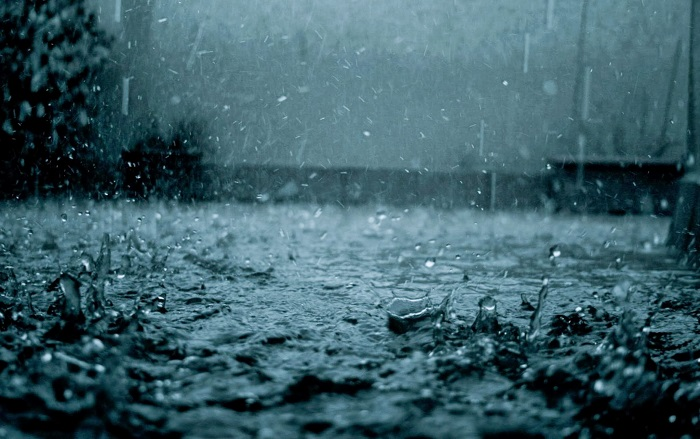

# Table of Contents
* [Introduction](#1)
* [Importing the Datasets](#2)
* [Data Visualization](#3)
* [Forecasting Annual rainfall for Assam and Meghalaya Using ARIMA Model](#4)
* [Building the ARIMA MODEL](#5)
* [CONCLUSION](#6)


<a id="1"></a> <br>
# Introduction
> The southwest summer monsoon, a four-month period when massive convective thunderstorms dominate India's weather, is Earth's most productive wet season. Monsoon rains impact the health of the Indian economy; as Indian agriculture employs 600 million people and constitutes 20% of the national GDP,good monsoons correlate with a booming economy. Weak or failed monsoons (droughts) result in widespread agricultural losses and substantially hinder overall economic growth.Yet such rains reduce temperatures and can replenish groundwater tables, rivers.

> *The datasets contain State-wise and District-wise distribution of rainfall in India over a period of 12 months from 1901-2015*
* We will use Data Visualization techniques to analyse the dataset and visualize the monthly and annual rainfall distributed over India
* We will try to predict the Annual rainfall

**Importing the libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
import plotly.graph_objects as go # Visualization

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

<a id="2"></a> <br>
# Importing the Datasets

In [2]:
rainfall = pd.read_csv('../input/rainfall-in-india/district wise rainfall normal.csv')
rainfall2 = pd.read_csv('../input/rainfall-in-india/rainfall in india 1901-2015.csv')

In [3]:
rainfall.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [4]:
rainfall2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [5]:
rainfall.isna().mean()

STATE_UT_NAME    0.0
DISTRICT         0.0
JAN              0.0
FEB              0.0
MAR              0.0
APR              0.0
MAY              0.0
JUN              0.0
JUL              0.0
AUG              0.0
SEP              0.0
OCT              0.0
NOV              0.0
DEC              0.0
ANNUAL           0.0
Jan-Feb          0.0
Mar-May          0.0
Jun-Sep          0.0
Oct-Dec          0.0
dtype: float64

<a id="3"></a> <br>
# **Data Visualization**
> **Statewise Monthly Distribution**

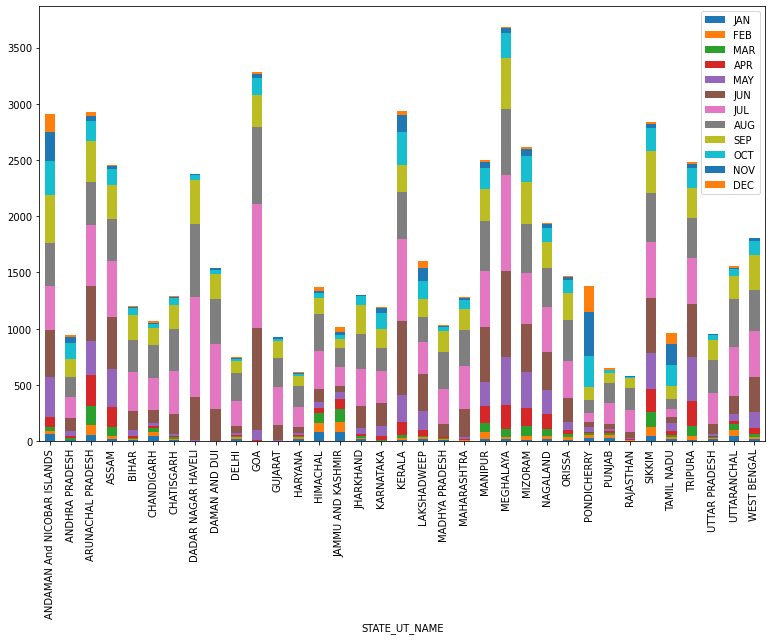

In [6]:
rainfall[['STATE_UT_NAME', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("STATE_UT_NAME").mean().plot.bar(stacked=True,figsize=(13,8));

> **District-Wise Monthly Distribution**

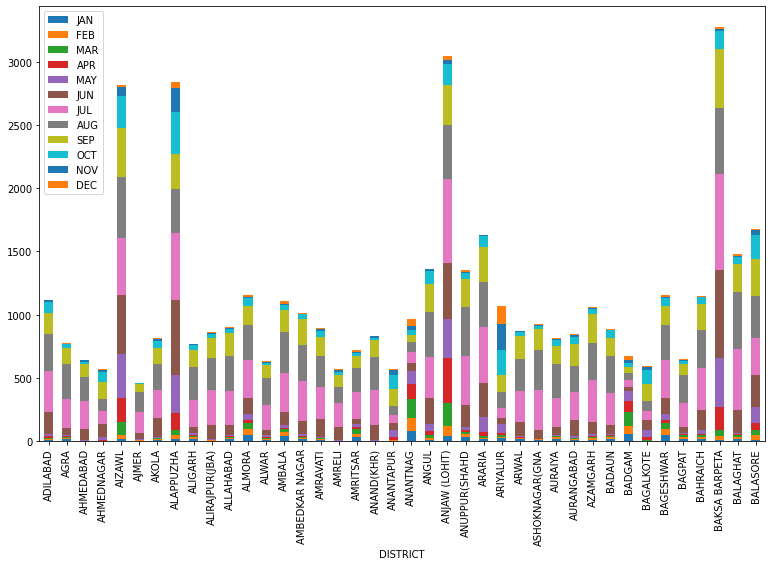

In [7]:
rainfall[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.bar(stacked=True,figsize=(13,8));

In [8]:
highest_rainfall = rainfall.sort_values(by ='ANNUAL' , ascending=False).head(6)


> **Top States with Highest Annual rainfall**

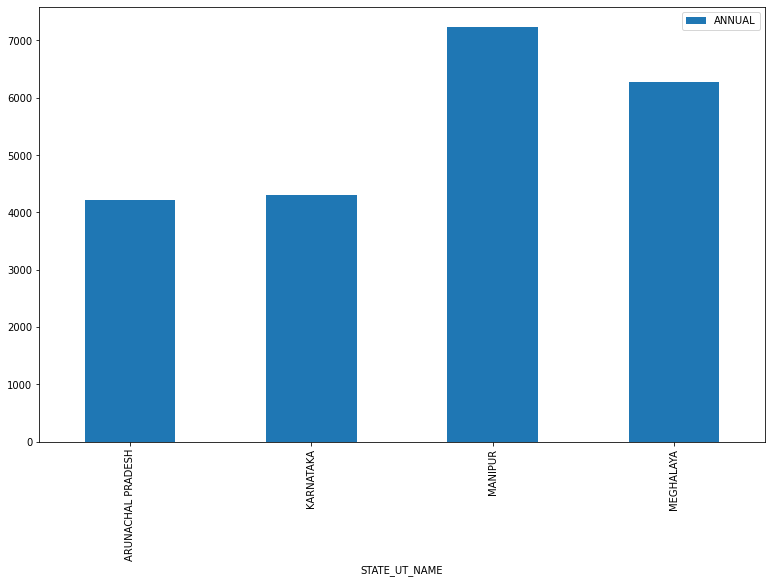

In [9]:
highest_rainfall[['STATE_UT_NAME', 'ANNUAL']].groupby("STATE_UT_NAME").mean().plot.bar(stacked=True,figsize=(13,8));

> **Top Districts with Highest Annual rainfall**

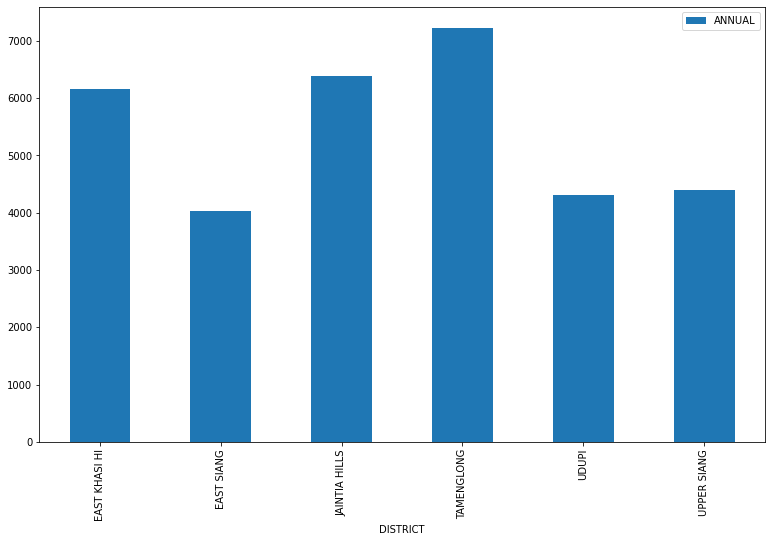

In [10]:
highest_rainfall[['DISTRICT', 'ANNUAL']].groupby("DISTRICT").mean().plot.bar(stacked=True,figsize=(13,8));

**Visualizing State-Wise Dataset according to YEARS**

> **Viewing dataset with Rainfall data from 1901-2015**

In [11]:
rainfall2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [12]:
highest_rainfall2 = rainfall2.sort_values(by ='ANNUAL' , ascending=False).head(6)


> **Top Years with highest rainfall**

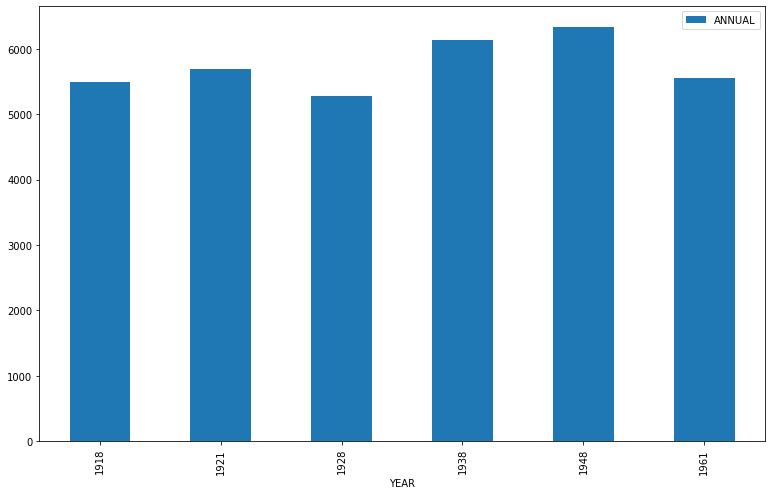

In [13]:
highest_rainfall2[['YEAR', 'ANNUAL']].groupby("YEAR").mean().plot.bar(stacked=True,figsize=(13,8));

In [14]:
lowest_rainfall2 = rainfall2.sort_values(by ='ANNUAL' , ascending=True).head(6)


> **Top Years with Lowest Rainfall**

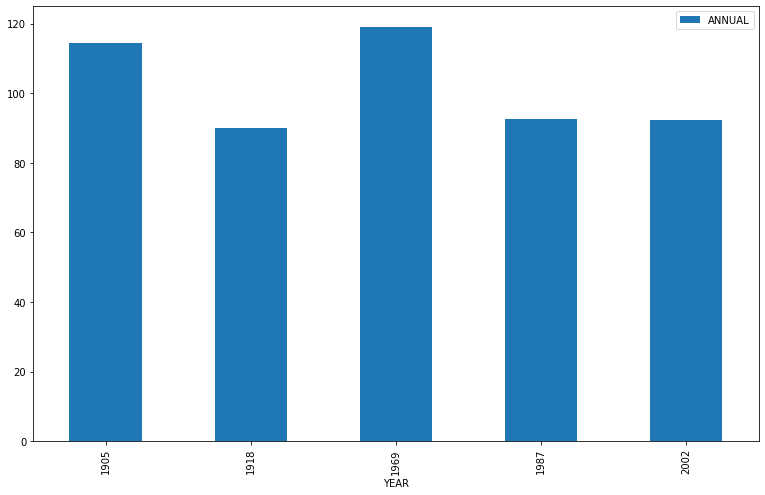

In [15]:
lowest_rainfall2[['YEAR', 'ANNUAL']].groupby("YEAR").mean().plot.bar(stacked=True,figsize=(13,8));

> **Monthly rainfall over the years from 1940**

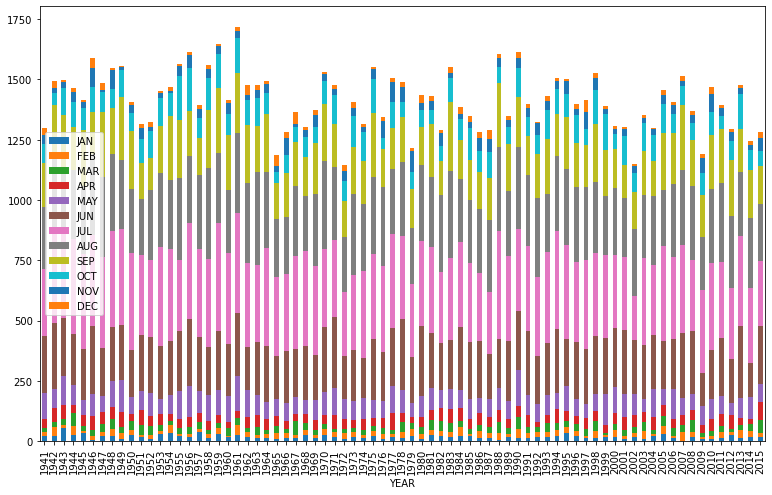

In [16]:
rainfall2[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").mean()[40:].plot.bar(stacked=True,figsize=(13,8));

> **Bi-Variate Analysis(Year-Annual Rain)**

<AxesSubplot:xlabel='YEAR', ylabel='ANNUAL'>

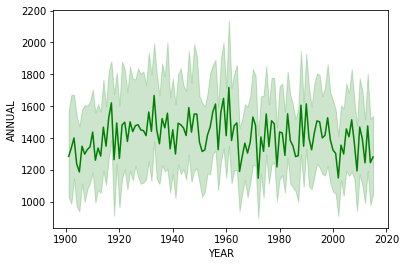

In [17]:
sns.lineplot(data=rainfall2,x='YEAR',y='ANNUAL',color='green')


> **Correlation**

<AxesSubplot:>

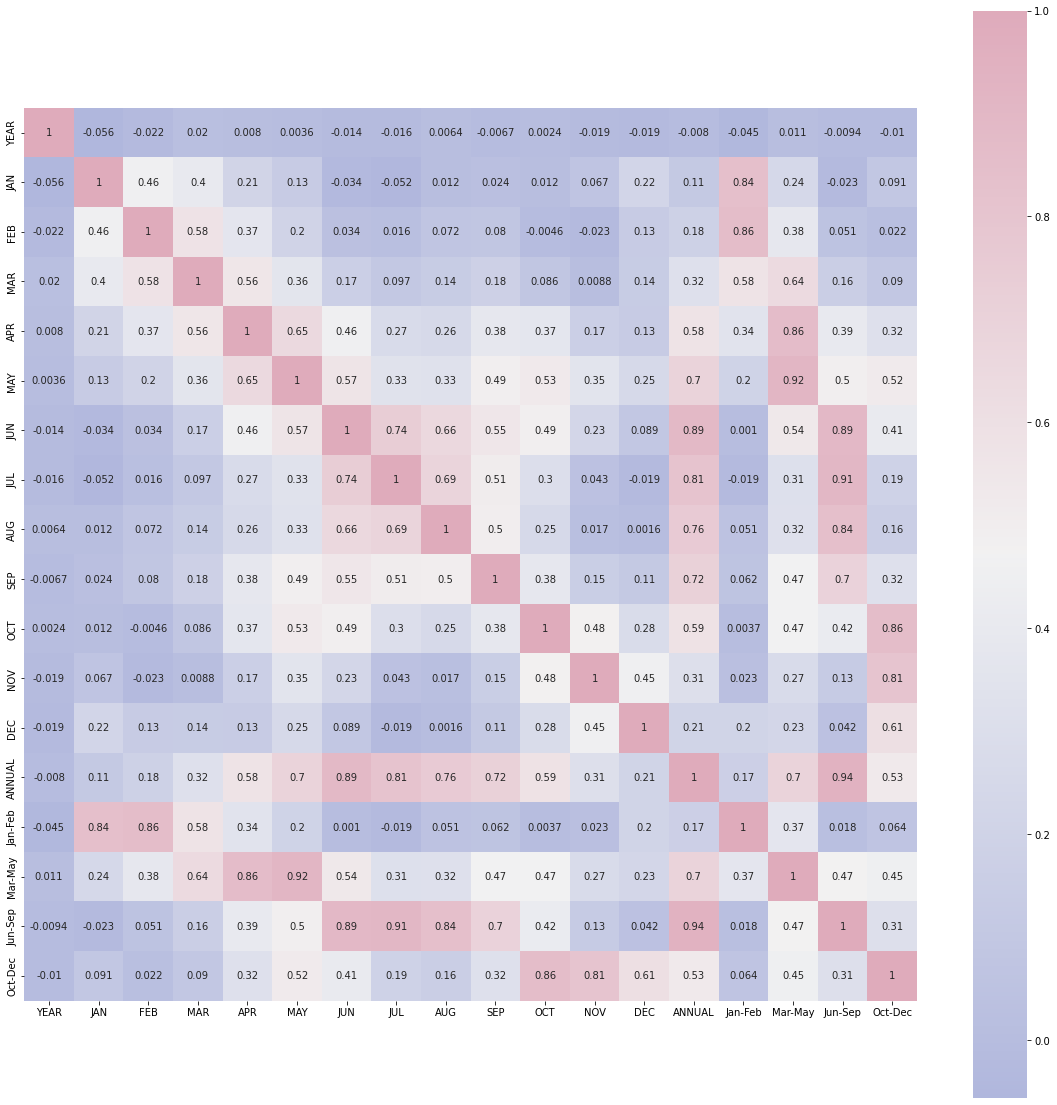

In [18]:
plt.figure(figsize=(20,20))
rain_corr = rainfall2.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
sns.heatmap(rain_corr, cmap= cmap,annot=True, square=True)

<a id="4"></a> <br>
# **Forecasting Annual rainfall for Assam and Meghalaya Using ARIMA Model**

In [19]:
rainfall3_ = pd.read_csv('../input/rainfall-in-india/rainfall in india 1901-2015.csv',usecols=['SUBDIVISION','YEAR','ANNUAL'], parse_dates=['YEAR'], index_col='YEAR')

               
#  Data Preprocessing

In [20]:
rainfall3= rainfall3_.loc[rainfall3_.SUBDIVISION=='ASSAM & MEGHALAYA', :]

In [21]:
rainfall3.head()

,SUBDIVISION,ANNUAL
YEAR,,
1901-01-01,ASSAM & MEGHALAYA,2498.6
1902-01-01,ASSAM & MEGHALAYA,2952.1
1903-01-01,ASSAM & MEGHALAYA,2544.7
1904-01-01,ASSAM & MEGHALAYA,2664.1
1905-01-01,ASSAM & MEGHALAYA,2790.6


In [22]:
#dictionary that maps column name to the number of unique values in the column
{column: len(rainfall3[column].unique()) for column in rainfall3.select_dtypes('object').columns}


{'SUBDIVISION': 1}

In [23]:
rainfall3.isna().mean()

SUBDIVISION    0.0
ANNUAL         0.0
dtype: float64

In [24]:
rainfall3=rainfall3.drop('SUBDIVISION',axis=1)

In [25]:
rainfall3.head()

,ANNUAL
YEAR,
1901-01-01,2498.6
1902-01-01,2952.1
1903-01-01,2544.7
1904-01-01,2664.1
1905-01-01,2790.6


> # Visualizing the time series

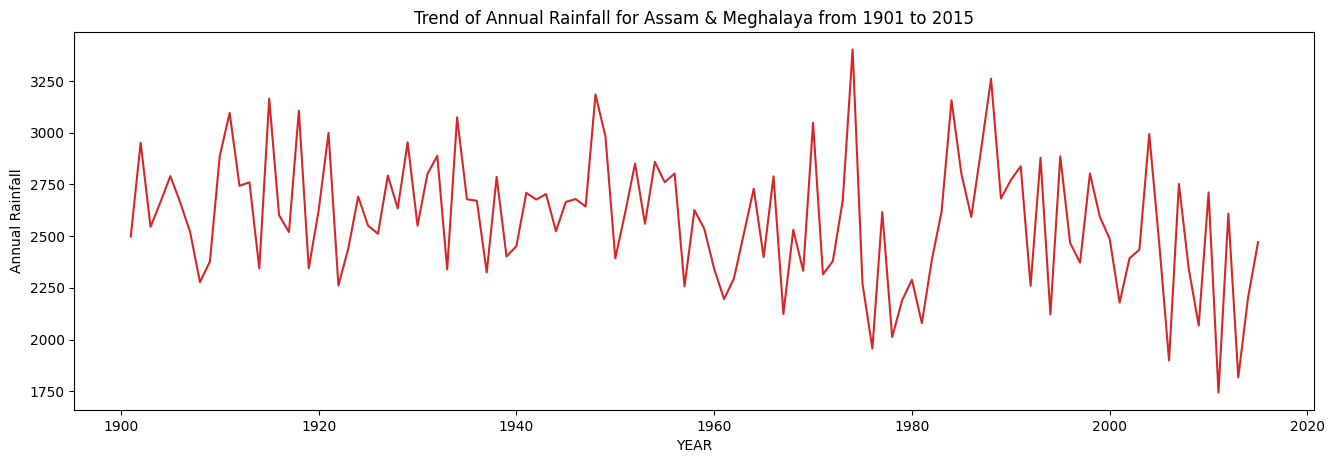

In [26]:
# Draw Plot
def plot_df(rainfall3, x, y, title="", xlabel='YEAR', ylabel='Annual Rainfall', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(rainfall3, x=rainfall3.index, y=rainfall3.ANNUAL, title='Trend of Annual Rainfall for Assam & Meghalaya from 1901 to 2015')

**Unit Root Test to test the Stationarity of the Time Series**
* Augmented Dickey Fuller test (ADF Test)
* Kwiatkowski-Phillips-Schmidt-Shin (KPSS Test) 

> **ADF Test**
> *Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.*
> * **Null Hypothesis:** the time series is non stationary

In [27]:
from statsmodels.tsa.stattools import adfuller, kpss

X = rainfall3['ANNUAL'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.128476
p-value: 0.000869
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


*Since the p value is way less than 0.05, therefore rejecting Null Hypothesis, the time series is Stationary*

> **KPSS Test**
> *This is another test conducted to check for stationarity. Here the Null and Alternate hypothesis are opposite of the ADF test*

In [28]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(rainfall3['ANNUAL'].values)

Results of KPSS Test:
Test Statistic            0.488573
p-value                   0.044240
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


*The p value is less than 0.05  but the null hypothesis of KPSS is opposite of ADF test so we reject the Null Hypothesis and conclude the trend is non stationary*
> **ADF test concludes stationarity but KPSS test concludes non stationarity. This indicates that one needs to use differencing to make the series stationary**

# > Plotting the ACF and PACF plots
Inspecting the Autocorrelation (ACF) and Partial Autocorrelation (PACF) plot we can find out the number of AR terms


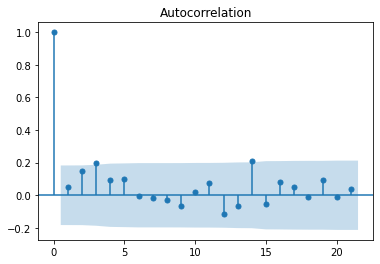

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(rainfall3['ANNUAL'].dropna())

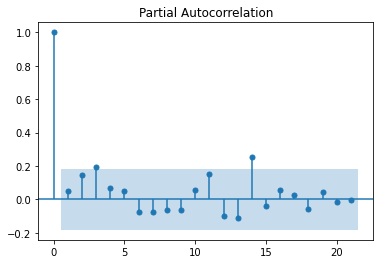

In [30]:
pacf_plot = plot_pacf(rainfall3['ANNUAL'].dropna())

**Differencing:**

In [31]:
rainfall3['ANNUAL_diff'] = rainfall3['ANNUAL'] - rainfall3['ANNUAL'].shift(12)
rainfall3.head(13)

,ANNUAL,ANNUAL_diff
YEAR,,
1901-01-01,2498.6,NaN
1902-01-01,2952.1,NaN
1903-01-01,2544.7,NaN
1904-01-01,2664.1,NaN
1905-01-01,2790.6,NaN
1906-01-01,2663.4,NaN
1907-01-01,2521.1,NaN
1908-01-01,2277.8,NaN
1909-01-01,2377.0,NaN


> **Removing the rows with NaN values**

In [32]:
#drop missing target rows
missing_target_rows=rainfall3[rainfall3['ANNUAL_diff'].isna()].index
#axis=0 since we're dropping rows
rainfall3=rainfall3.drop(missing_target_rows,axis=0)

In [33]:
rainfall3.head()

,ANNUAL,ANNUAL_diff
YEAR,,
1913-01-01,2760.5,261.9
1914-01-01,2343.8,-608.3
1915-01-01,3165.1,620.4
1916-01-01,2601.1,-63.0
1917-01-01,2519.9,-270.7


In [34]:
rainfall3['ANNUAL_diff'].isna().mean()

0.0

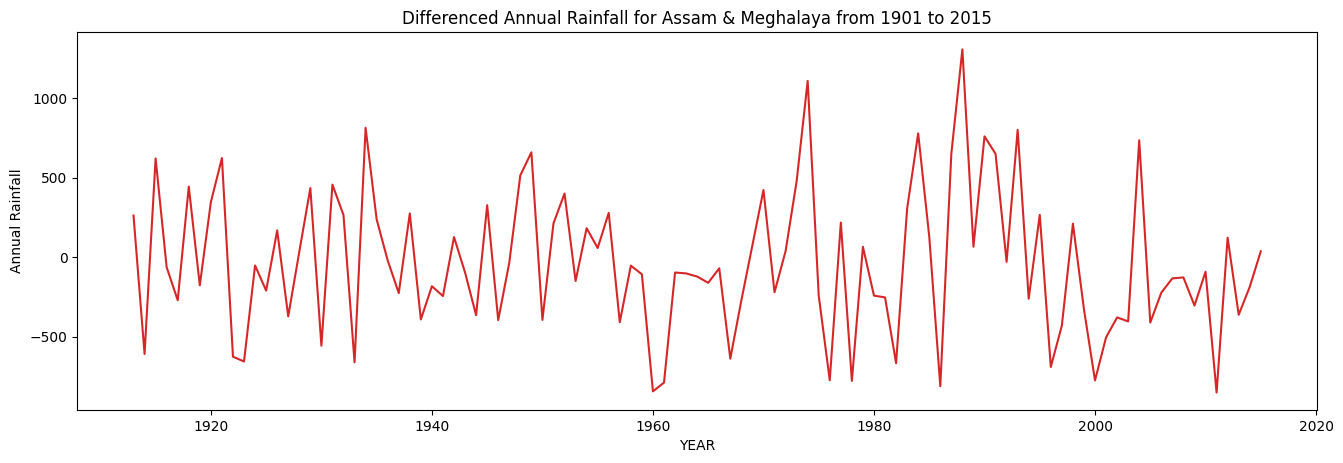

In [35]:
# Draw Plot
def plot_df(rainfall3, x, y, title="", xlabel='YEAR', ylabel='Annual Rainfall', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(rainfall3, x=rainfall3.index, y=rainfall3.ANNUAL_diff, title='Differenced Annual Rainfall for Assam & Meghalaya from 1901 to 2015')

**Again conducting the ADF and KPSS test for checking Stationarity of the series**

In [36]:
#ADF test
X = rainfall3['ANNUAL_diff'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.567186
p-value: 0.099971
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


*After ADF test p value is greater than 0.05 after 1st differencing, series is not stationary*

In [37]:
kpss_test(X)

Results of KPSS Test:
Test Statistic            0.109512
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


*After KPSS test p value is greater than 0.05, being oppositing of ADF test, rejects null hypothesis, hence trend Stationary*
**Plotting the ACF and PACF plots again**

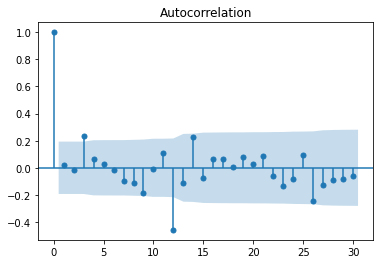

In [38]:
acf_plot = plot_acf(rainfall3['ANNUAL_diff'].dropna(), lags= 30)

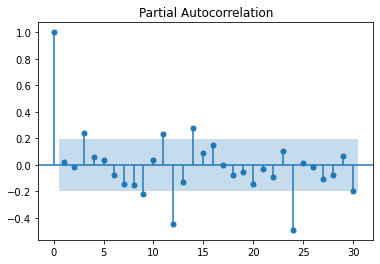

In [39]:
pacf_plot = plot_pacf(rainfall3['ANNUAL_diff'].dropna(), lags= 30)

**Differencing again:**

In [40]:
rainfall3['ANNUAL_diff21'] = rainfall3['ANNUAL_diff'] - rainfall3['ANNUAL_diff'].shift(1)
rainfall3.head()

,ANNUAL,ANNUAL_diff,ANNUAL_diff21
YEAR,,,
1913-01-01,2760.5,261.9,NaN
1914-01-01,2343.8,-608.3,-870.2
1915-01-01,3165.1,620.4,1228.7
1916-01-01,2601.1,-63.0,-683.4
1917-01-01,2519.9,-270.7,-207.7


**Removing the NaN values**

In [41]:
#drop missing target rows
missing_target_rows=rainfall3[rainfall3['ANNUAL_diff21'].isna()].index
#axis=0 since we're dropping rows
rainfall3=rainfall3.drop(missing_target_rows,axis=0)

In [42]:
rainfall3.head()

,ANNUAL,ANNUAL_diff,ANNUAL_diff21
YEAR,,,
1914-01-01,2343.8,-608.3,-870.2
1915-01-01,3165.1,620.4,1228.7
1916-01-01,2601.1,-63.0,-683.4
1917-01-01,2519.9,-270.7,-207.7
1918-01-01,3106.8,443.4,714.1


**Conducting the ADF and KPSS test again**

In [43]:
# ADF Test 
X = rainfall3['ANNUAL_diff21'].dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.955616
p-value: 0.000027
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585


In [44]:
# KPSS Test:
kpss_test(X)

Results of KPSS Test:
Test Statistic            0.099785
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


**At this step, both the tests confirm that the series is stationary. Let us plot the ACF and PACF plots and also the plot for the overall differenced series**

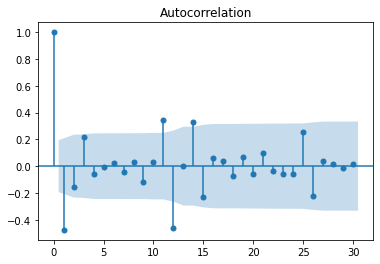

In [45]:
acf_plot = plot_acf(rainfall3['ANNUAL_diff21'].dropna(), lags= 30)

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


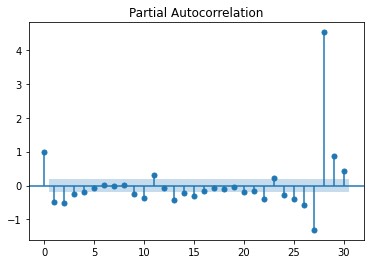

In [46]:
pacf_plot = plot_pacf(rainfall3['ANNUAL_diff21'].dropna(), lags= 30)

**Both the plots do have significant lags but we will go ahead and treat the series stationary as confirmed by the ADF and KPSS tests. The plot of the differenced series is as follows:**

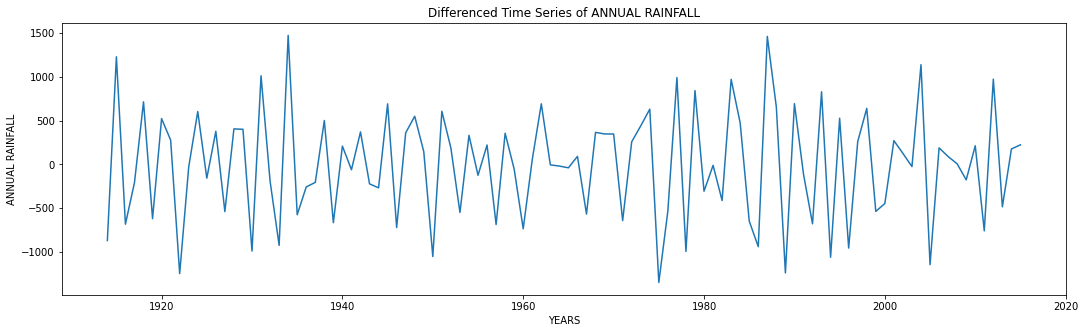

In [47]:
plt.figure(figsize=(18,5));
plt.xlabel('YEARS');
plt.ylabel('ANNUAL RAINFALL');
plt.title('Differenced Time Series of ANNUAL RAINFALL');
plt.plot(rainfall3['ANNUAL_diff21']);

> # Finding the order of the AR term (p) and MA term(q) 
* **From the PACF plot, 2 values come properly outside the significance region so maximum value of P can be 2**
* **From the ACF plot, after 2 values there is a positive value of lag but the 2nd value doesnt cross the significance region so the so maximum value of q can be 1**
> **So the order we will start to create the first ARIMA Model = (2,2,1)**

<a id="5"></a> <br>
# Building the ARIMA MODEL

In [48]:
# Create Training and Test
train = rainfall3.ANNUAL[:85]
test = rainfall3.ANNUAL[85:]

In [49]:
from statsmodels.tsa.arima_model import ARIMA

#orders to try (2,2,1),(2,2,0),(1,2,0),(0,2,0),(1,2,1),(0,2,1)
model = ARIMA(rainfall3.ANNUAL, order=(2,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.ANNUAL   No. Observations:                  100
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -754.054
Method:                       css-mle   S.D. of innovations            451.961
Date:                Fri, 03 Dec 2021   AIC                           1516.108
Time:                        16:04:39   BIC                           1526.528
Sample:                    01-01-1916   HQIC                          1520.325
                         - 01-01-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2502     16.695      0.015      0.988     -32.472      32.972
ar.L1.D2.ANNUAL    -1.1148      0.081    -13.816      0.000      -1.273      -0.957
ar.L2.D2.ANNUAL    -0.6160      

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

In [50]:
#orders to try (2,2,1),(2,2,0),(1,2,0),(0,2,0),(1,2,1),(0,2,1)
model = ARIMA(rainfall3.ANNUAL, order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.ANNUAL   No. Observations:                  100
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -776.385
Method:                       css-mle   S.D. of innovations            567.751
Date:                Fri, 03 Dec 2021   AIC                           1558.770
Time:                        16:04:39   BIC                           1566.586
Sample:                    01-01-1916   HQIC                          1561.933
                         - 01-01-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5922     33.741      0.018      0.986     -65.539      66.723
ar.L1.D2.ANNUAL    -0.6897      0.073     -9.458      0.000      -0.833      -0.547
                                

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

In [51]:
#orders to try (2,2,1),(2,2,0),(1,2,0),(0,2,0),(1,2,1),(0,2,1)
model = ARIMA(rainfall3.ANNUAL, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.ANNUAL   No. Observations:                  100
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -807.818
Method:                           css   S.D. of innovations            779.956
Date:                Fri, 03 Dec 2021   AIC                           1619.635
Time:                        16:04:39   BIC                           1624.846
Sample:                    01-01-1916   HQIC                          1621.744
                         - 01-01-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5650     77.996     -0.071      0.943    -158.434     147.304


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

In [52]:
#orders to try (2,2,1),(2,2,0),(1,2,0),(0,2,0),(1,2,1),(0,2,1)
model = ARIMA(rainfall3.ANNUAL, order=(0,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.ANNUAL   No. Observations:                  100
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -753.876
Method:                       css-mle   S.D. of innovations            444.428
Date:                Fri, 03 Dec 2021   AIC                           1513.752
Time:                        16:04:40   BIC                           1521.567
Sample:                    01-01-1916   HQIC                          1516.915
                         - 01-01-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1917      1.517     -0.126      0.899      -3.164       2.781
ma.L1.D2.ANNUAL    -0.9999      0.025    -40.546      0.000      -1.048      -0.952
                                

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

**We will use ARIMA(0,2,1) for the forecast as it has the least AIC value**

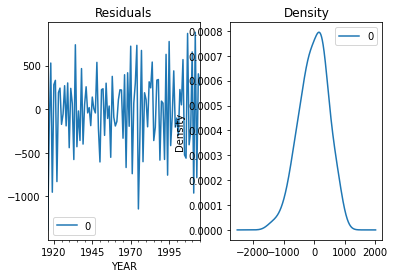

In [53]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

> **The residual errors seem fine with near zero mean and uniform variance**

<a id="6"></a> <br>
# CONCLUSION

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


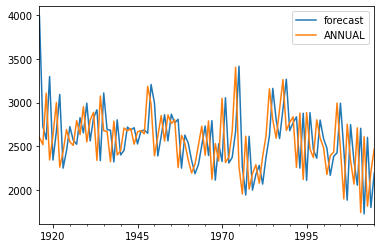

In [54]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

> **ARIMA model with order (0,2,1) seems like the best option for now with the least AIC and p values and the forecasted values are almost same as the actual values for the States of ASSAM and MEGHALAYA**

> **Hence we can use the similar method to forecast the ANNUAL RAINFALL for all States**